In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

# Read data

In [6]:
y = read_target_train()

In [3]:
train_data = read_data('train')

In [4]:
test_data = read_data('test')

# Preprocess data

In [7]:
X, X_test = read_preprocessed_data()

# Train catboost

In [3]:
from catboost import CatBoostRegressor

In [8]:
model_tst = CatBoostRegressor(iterations = 100, verbose = 250, random_state = config['random_state'])
model_C = CatBoostRegressor(iterations = 100, verbose = 250, random_state = config['random_state'])

In [9]:
cross_val(X, y, model_tst, model_C)

Learning rate set to 0.245535
0:	learn: 28.5044613	total: 1.42s	remaining: 2m 20s


KeyboardInterrupt: 

In [10]:
model_tst.fit(X, y['TST'])

Learning rate set to 0.255495
0:	learn: 28.0892095	total: 38.1ms	remaining: 3.77s
99:	learn: 9.6208148	total: 3.41s	remaining: 0us


In [11]:
model_C.fit(X, y['C'])

Learning rate set to 0.255495
0:	learn: 0.0907913	total: 48.2ms	remaining: 4.77s
99:	learn: 0.0146537	total: 3.57s	remaining: 0us


In [12]:
save_catboost_models(model_tst, model_C)

<BarContainer object of 15 artists>

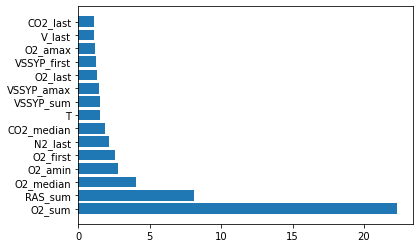

In [19]:
args = model_tst.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_tst.feature_names_)[args], model_tst.feature_importances_[args]) 
